# Making charts with MPL Finance

In [5]:
import yfinance as yf
import mplfinance as mpf
import ta

In [30]:
df = yf.download('NVDA', start='2024-07-01')

[*********************100%%**********************]  1 of 1 completed


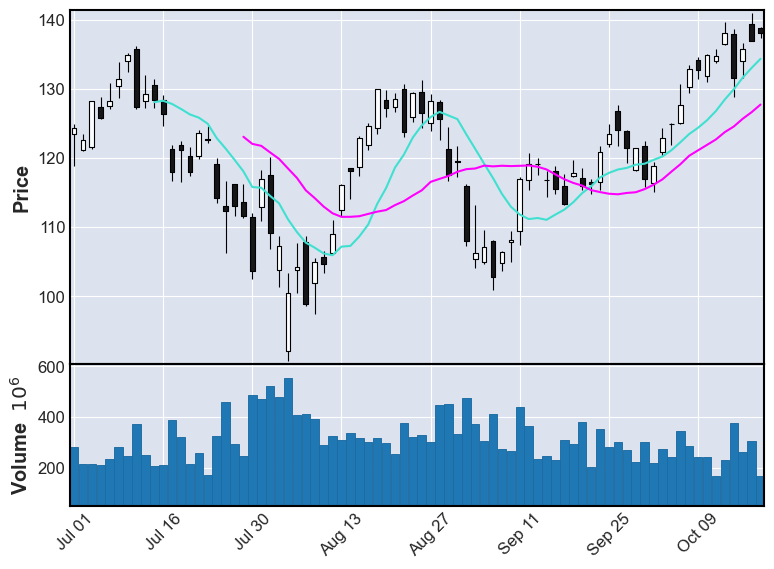

In [31]:
mpf.plot(df, type='candle', mav=(10, 20), volume=True, tight_layout=True, style='default')

In [32]:
mpf.available_styles()

['binance',
 'binancedark',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'tradingview',
 'yahoo']

In [36]:
df['EMA50'] = ta.trend.ema_indicator(df.Close, 50)
df['EMA25'] = ta.trend.ema_indicator(df.Close, 25)

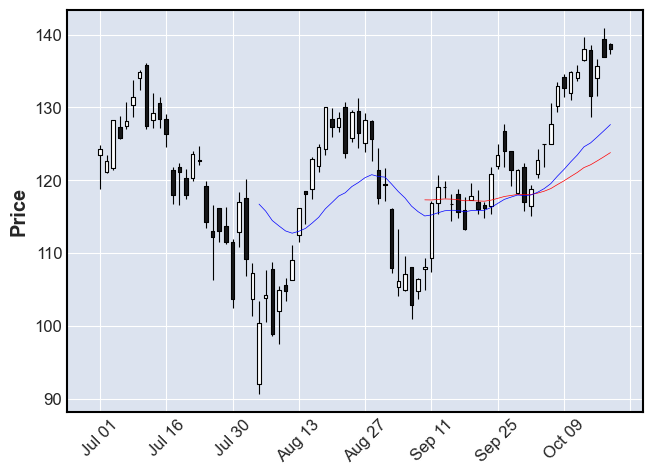

In [39]:
EMA = [mpf.make_addplot(df.EMA50, type='line', color='r', width=0.5),
       mpf.make_addplot(df.EMA25, type='line', color='b', width=0.5)]
       
mpf.plot(df, type='candle', addplot=EMA)

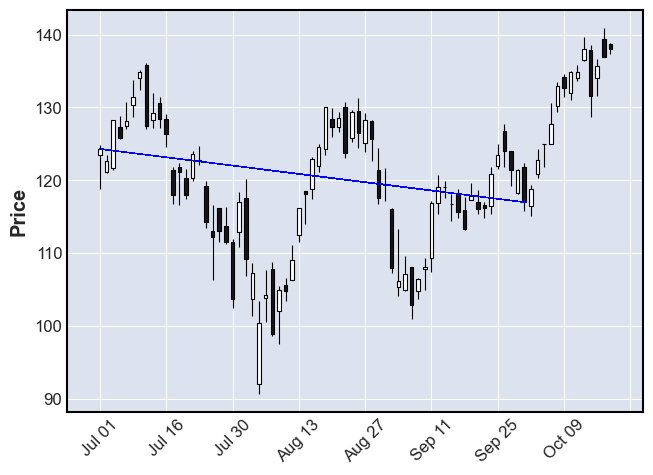

In [46]:
# Add a trendline 

datepairs = [('2024-07-01','2024-10-01')]

mpf.plot(df, type='candle', tlines=[dict(tlines=datepairs, colors='b', linewidths=0.5)])

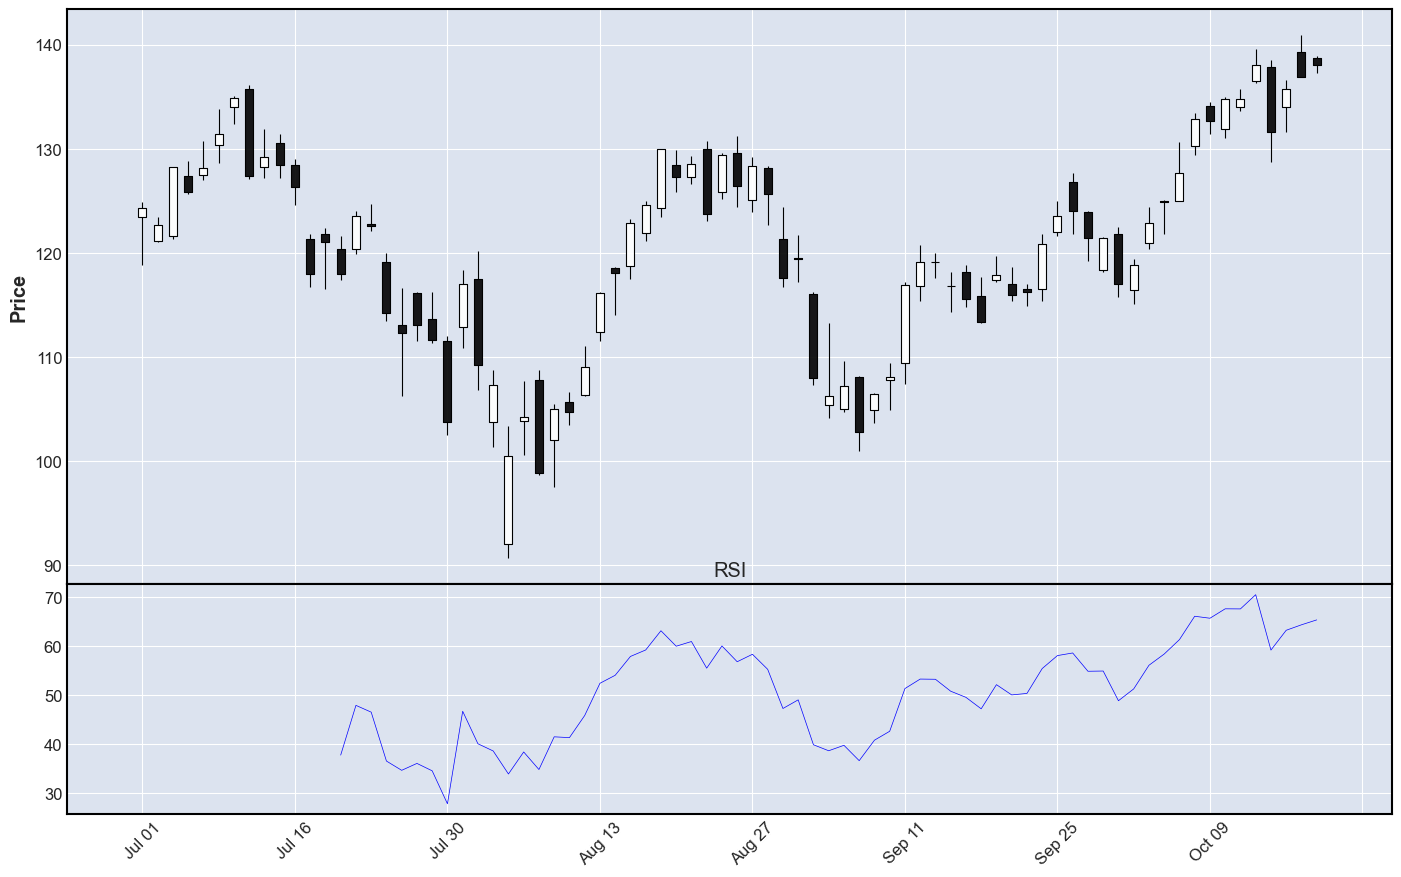

In [52]:
df['RSI'] = ta.momentum.rsi(df.Close, 14)

RSI = mpf.make_addplot(df.RSI, type='line', color='b', width=0.5, panel=1, title='RSI')

mpf.plot(df, type='candle', main_panel=0, addplot = RSI, figscale=2, figratio=(8,5))